# Uni Variate Analysis
### Analyze each variable and suggest transformations required to enrich the dataset.

In [1]:

import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path.cwd().parent))

# Import from utils package
from utils.eda_helpers import (
    analyze_frequency_distribution,
    calculate_default_rates,
    perform_chi_square_test,
    calculate_cramers_v,
    interpret_results,
    check_missing_values
)

from loguru import logger

logger.success("✅ All imports successful!")


2026-01-06 21:37:27.701 | SUCCESS  | __main__:<module>:21 - ✅ All imports successful!


✅ Plotting configuration loaded
   Default figure size: (12, 6)
   Available sizes: ['small', 'medium', 'large', 'wide', 'square', 'report']
   Color palette: 6 colors


In [2]:
file_path = '../data/raw/loan_preprocessed.parquet'

def read_data(file_path = file_path):
    """Reads the dataset from the preprocessed data - Parquet file."""
    logger.info(f"Reading data from {file_path}...")
    try: 
        df = pd.read_parquet(file_path)
        logger.success("Data read successfully.")
        return df
    except Exception as e:
        logger.error(f"Error reading data: {e}")
        raise e 


df = read_data()
df.sample(5)
# rename target column for use of helper functions
df.rename(columns={'loan_status': 'target'}, inplace=True)

df['target'] = df['target'].map({
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1    

})

2026-01-06 21:37:29.164 | INFO     | __main__:read_data:5 - Reading data from ../data/raw/loan_preprocessed.parquet...
2026-01-06 21:37:29.542 | SUCCESS  | __main__:read_data:8 - Data read successfully.


### List all Categorical Columns


In [7]:
df.select_dtypes(include=['object']).columns


Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'earliest_cr_line',
       'application_type', 'verification_status_joint',
       'sec_app_earliest_cr_line'],
      dtype='object')

### Categorical Columns Analysis


## Term

2026-01-06 21:38:08.788 | INFO     | utils.eda_helpers:analyze_frequency_distribution:59 - 
2026-01-06 21:38:08.790 | INFO     | utils.eda_helpers:analyze_frequency_distribution:60 - FREQUENCY DISTRIBUTION: term
2026-01-06 21:38:08.790 | INFO     | utils.eda_helpers:analyze_frequency_distribution:61 - ============================================================



Absolute Counts:
term
 36 months    988774
 60 months    314864
Name: count, dtype: int64

Percentage Distribution:
term
 36 months    75.85
 60 months    24.15
Name: proportion, dtype: float64

────────────────────────────────────────────────────────────
Summary:
  Total categories: 2
  Total observations: 1,303,638

✅ No rare categories detected (all >1.0%)


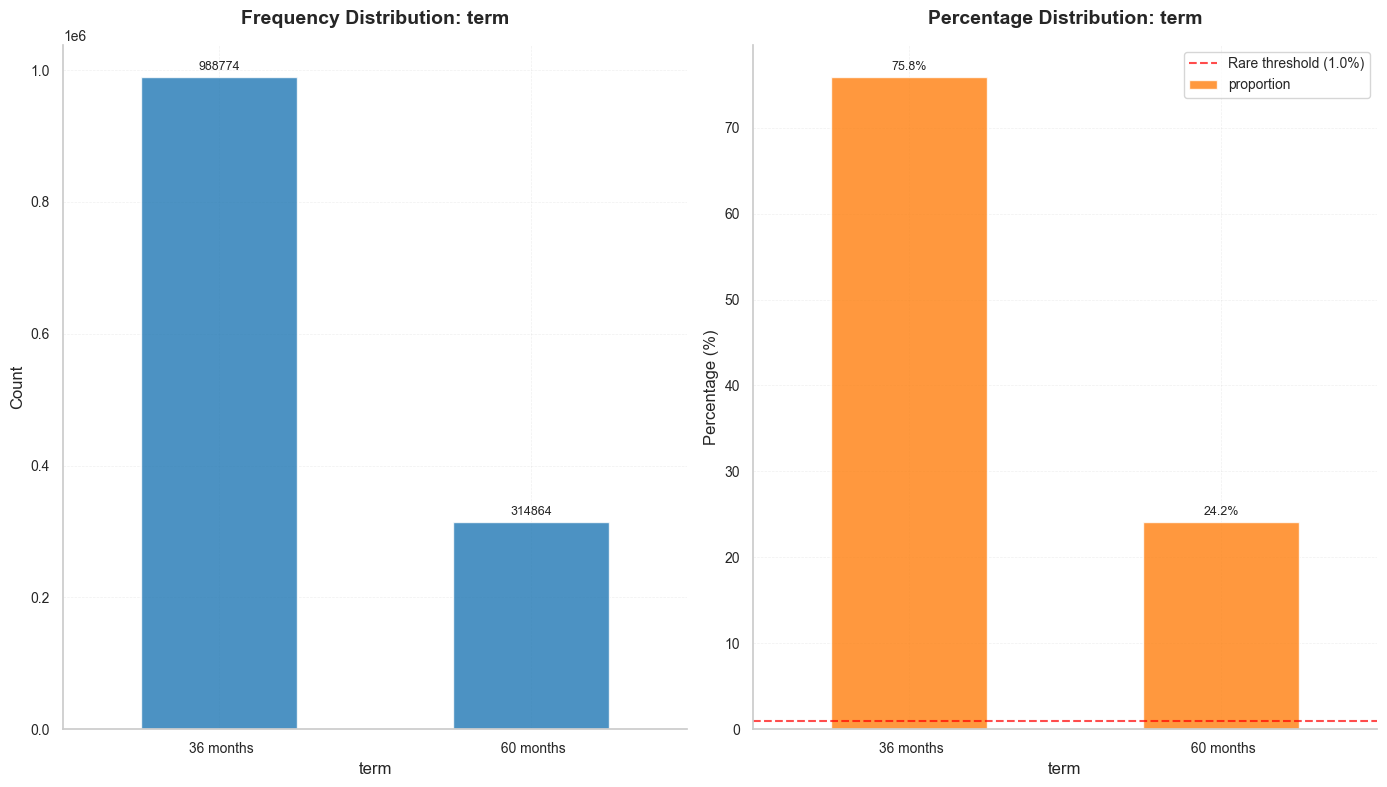

In [8]:
freq_results = analyze_frequency_distribution(df, 'term', plot=True)

2026-01-06 21:38:22.764 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-06 21:38:22.765 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: term
2026-01-06 21:38:22.766 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: term
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
      term  total_loans  defaults  default_rate_%
 60 months       314864    102517           32.56
 36 months       988774    159169           16.10

────────────────────────────────────────────────────────────
Key Statistics:
  Overall default rate:     20.07%
  Minimum default rate:     16.10%
  Maximum default rate:     32.56%
  Range:                    16.46 percentage points
  Risk ratio (max/min):     2.02x

⚠️  High-risk categories (>30% default):
    -  60 months: 32.56% (314,864 loans)

────────────────────────────────────────────────────────────
✅ STRONG SIGNAL: Large variation in default rates (>10 points)
   This feature has good predictive power for modeling

Generating plots...


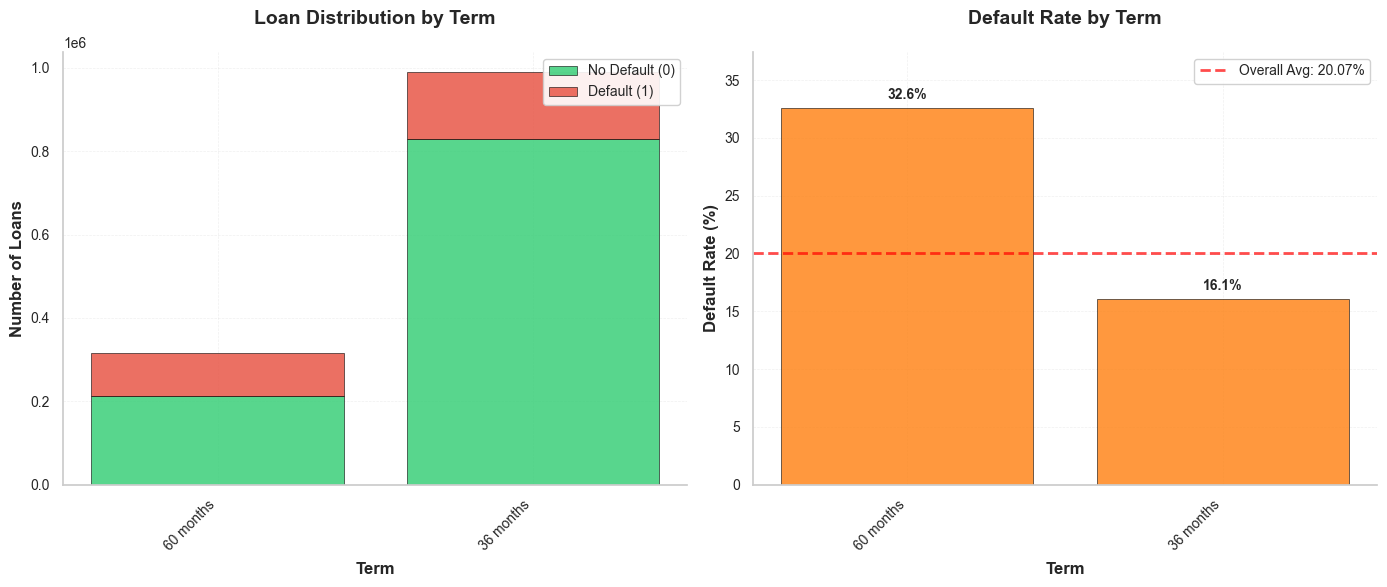

✅ Plots generated successfully


In [9]:
default_results = calculate_default_rates(df, 'term', plot=True)


In [12]:
# Step 3: Chi-square test
chi2_results = perform_chi_square_test(df, 'term')



2026-01-06 21:41:28.329 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-06 21:41:28.330 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: term
2026-01-06 21:41:28.331 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 40,334.62
  P-value:             0.0000e+00
  Degrees of freedom:  1
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → term IS significantly associated with default


In [13]:
crammers_v = calculate_cramers_v(df, 'term', 'target')

2026-01-06 21:41:31.685 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-06 21:41:31.686 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): term
2026-01-06 21:41:31.687 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.1759

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
✅ Cramér's V = 0.1759 → MODERATE

Variance Explained: 3.09%


In [11]:
interpret_results(
    chi2_results=chi2_results,
    cramers_results=crammers_v,
    freq_results=freq_results,
    default_results=default_results,
    column='term'
)


╔════════════════════════════════════════════════════════════════════╗
║                     FINAL RECOMMENDATION: term                     ║
╚════════════════════════════════════════════════════════════════════╝

Decision: ✅✅ KEEP FEATURE (Strong Predictor)

Rationale:
  ✅ Statistically significant (p < 0.05)
  ✅✅ Strong effect size (V = 0.1759)
  ✅ Explains 3.1% of default variation
  ✅ Large default rate range (16.5 points)

Recommended Encoding: One-Hot Encoding

Implementation:
  df['term'] = df['term'].str.strip()
  dummies = pd.get_dummies(df['term'], prefix='term', drop_first=True)

══════════════════════════════════════════════════════════════════════



In [ ]:
check_missing_values = check_missing_values(df, 'term')